In [10]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
import flask
import io
import os

model = None

videos_dir = './video_data/AmC9SmCBUj4'

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
def load_model():
    global model
    model = ResNet50(weights='imagenet')

load_model()

In [14]:
def prepare_image(image, target):
    if image.mode != "RGB":
        image = image.convert("RGB")

    image = image.resize(target)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = imagenet_utils.preprocess_input(image)

    return image


def predict(image_path): 
    data = {
        "success": False
    }
    
    image = Image.open(image_path)
    
    image = prepare_image(image, target=(224, 224))
    
    # classify
    preds = model.predict(image)
    results = imagenet_utils.decode_predictions(preds)
    data["predictions"] = []

    for (imagenetId, label, prob) in results[0]:
        r = {
          "label": label,
          "probability": float(prob)
        }
        data["predictions"].append(r)

    data["success"] = True 
    
    return data

In [15]:
def filter_image(f):
    return os.path.isfile(os.path.join(videos_dir, f)) and not f.endswith(".mp4")

image_names = [f for f in os.listdir(videos_dir) if filter_image(f)]

# test_image_path = os.path.join(videos_dir, onlyfiles[3])

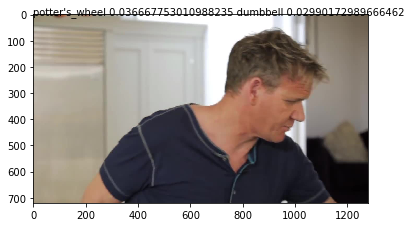

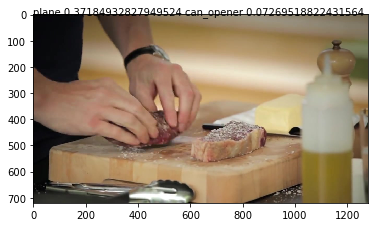

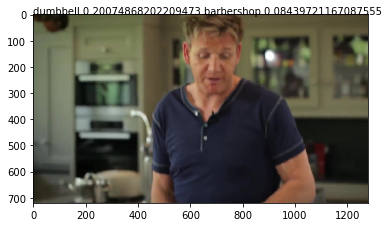

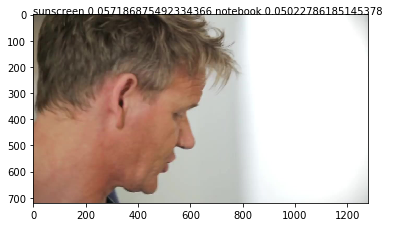

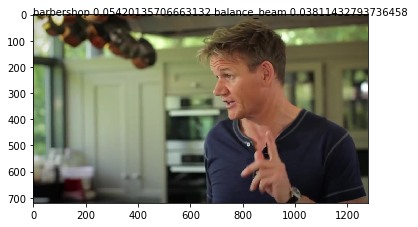

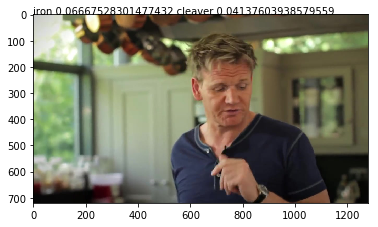

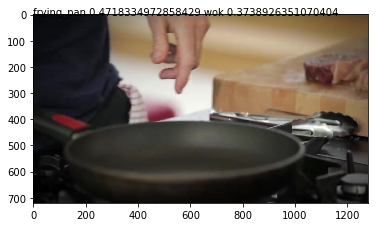

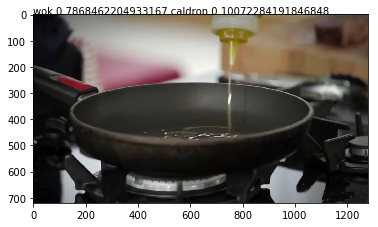

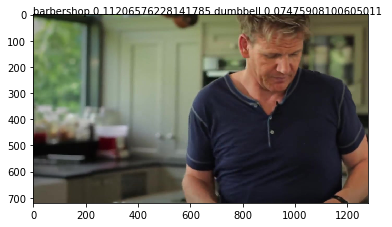

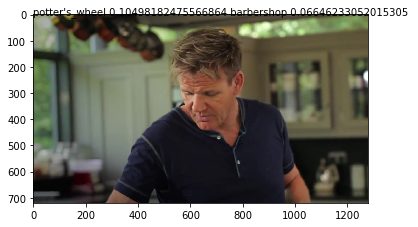

In [19]:
for img_path in image_names[:10]:
    p = os.path.join(videos_dir, img_path)
    preds = predict(p)['predictions']
    image_sh = mpimg.imread(p)
    plt.figure()
    label = ""
    for pred in preds[:2]:
        label += pred['label'] + " " + str(pred['probability']) + " "
    plt.text(-1, -1, label)
    plt.imshow(image_sh)